In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from sklearn.model_selection import train_test_split
from sklearn.linear_model import PassiveAggressiveRegressor

data = pd.read_csv("covid_worldwide.csv", encoding = 'latin1')
#dataset source: https://www.kaggle.com/datasets/themrityunjaypathak/covid-cases-and-deaths-worldwide?resource=download
data.head(10)

,Serial Number,Country,Total Cases,Total Deaths,Total Recovered,Active Cases,Total Test,Population
0,1,USA,"104,196,861","1,132,935","101,322,779","1,741,147","1,159,832,679","334,805,269"
1,2,India,"44,682,784","530,740","44,150,289","1,755","915,265,788","1,406,631,776"
2,3,France,"39,524,311","164,233","39,264,546","95,532","271,490,188","65,584,518"
3,4,Germany,"37,779,833","165,711","37,398,100","216,022","122,332,384","83,883,596"
4,5,Brazil,"36,824,580","697,074","35,919,372","208,134","63,776,166","215,353,593"
5,6,Japan,"32,588,442","68,399","21,567,425","10,952,618","92,144,639","125,584,838"
6,7,S. Korea,"30,197,066","33,486","29,740,877","422,703","15,804,065","51,329,899"
7,8,Italy,"25,453,789","186,833","25,014,986","251,970","265,478,247","60,262,770"
8,9,UK,"24,274,361","204,171","24,020,088","50,102","522,526,476","68,497,907"
9,10,Russia,"21,958,696","395,108","21,356,008","207,580","273,400,000","145,805,947"


In [26]:
data.isnull().sum()
data = data.dropna()
data.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 195 entries, 0 to 224
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Serial Number    195 non-null    int64 
 1   Country          195 non-null    object
 2   Total Cases      195 non-null    object
 3   Total Deaths     195 non-null    object
 4   Total Recovered  195 non-null    object
 5   Active Cases     195 non-null    object
 6   Total Test       195 non-null    object
 7   Population       195 non-null    object
dtypes: int64(1), object(7)
memory usage: 13.7+ KB


In [12]:
data.shape

(231, 8)

In [24]:
data.nunique() 

Serial Number      231
Country            231
Total Cases        231
Total Deaths       213
Total Recovered    210
Active Cases       181
Total Test         212
Population         228
dtype: int64

In [30]:
data.describe()

,Serial Number,Total Cases,Total Deaths,Total Recovered,Active Cases,Total Test,Population
count,195.000000,1.950000e+02,1.950000e+02,1.950000e+02,1.950000e+02,1.950000e+02,1.950000e+02
mean,107.189744,3.329258e+06,3.378704e+04,3.197261e+06,9.821017e+04,3.375474e+07,3.207370e+07
std,64.303965,1.019503e+07,1.125272e+05,9.846399e+06,7.988122e+05,1.220386e+08,1.099820e+08
min,1.000000,1.403000e+03,1.000000e+00,4.380000e+02,0.000000e+00,7.850000e+03,4.965000e+03
25%,51.500000,3.786550e+04,3.130000e+02,3.469950e+04,7.800000e+01,4.010440e+05,1.100457e+06
50%,104.000000,2.977570e+05,3.155000e+03,2.889910e+05,1.253000e+03,2.610114e+06,6.844597e+06
75%,162.000000,1.723625e+06,1.687700e+04,1.708095e+06,1.084850e+04,1.477275e+07,2.782692e+07
max,225.000000,1.041969e+08,1.132935e+06,1.013228e+08,1.095262e+07,1.159833e+09,1.406632e+09


In [48]:
fig = px.scatter_geo(data, locations='Country',locationmode="country names",scope="world",color="Total Cases",size="Total Cases",size_max=25,title="Covid-19: Total Cases Around the Globe",template='seaborn',color_continuous_scale="sunsetdark")
fig.show()

In [50]:
fig = px.scatter_geo(data, locations='Country',locationmode="country names",scope="world",color="Total Deaths",size="Total Deaths",size_max=25,title="Covid-19: Total Deaths Around the Globe",template='seaborn',color_continuous_scale="sunsetdark")
fig.show()

In [52]:
fig = px.scatter_geo(data, locations='Country',locationmode="country names",scope="world",color="Total Recovered",size="Total Recovered",size_max=25,title="Covid-19: Total Recovered Around the Globe",template='seaborn',color_continuous_scale="emrld")
fig.show()

In [59]:
fig = px.scatter_geo(data, locations='Country',locationmode="country names",scope="world",color="Active Cases",size="Active Cases",size_max=25,title="Covid-19: Active Cases Around the Globe",template='seaborn',color_continuous_scale="emrld")
fig.show()

In [65]:
least_deaths = data[['Total Deaths', 'Country']].sort_values(by="Total Deaths",ascending=True)
least_deaths = least_deaths.head(10)
least_deaths

,Total Deaths,Country
216,1,Nauru
209,2,Cook Islands
219,2,Saint Pierre Miquelon
220,7,Wallis and Futuna
224,8,Montserrat
213,9,Palau
217,12,Anguilla
185,13,Tonga
194,14,Vanuatu
147,21,Bhutan


In [68]:
most_deaths = data[['Total Deaths', 'Country']].sort_values(by="Total Deaths",ascending=False)
most_deaths = most_deaths.head(10)
most_deaths = most_deaths.sort_values(by="Total Deaths", ascending=True)
most_deaths

,Total Deaths,Country
2,164233,France
3,165711,Germany
7,186833,Italy
8,204171,UK
34,218931,Peru
18,332198,Mexico
9,395108,Russia
1,530740,India
4,697074,Brazil
0,1132935,USA


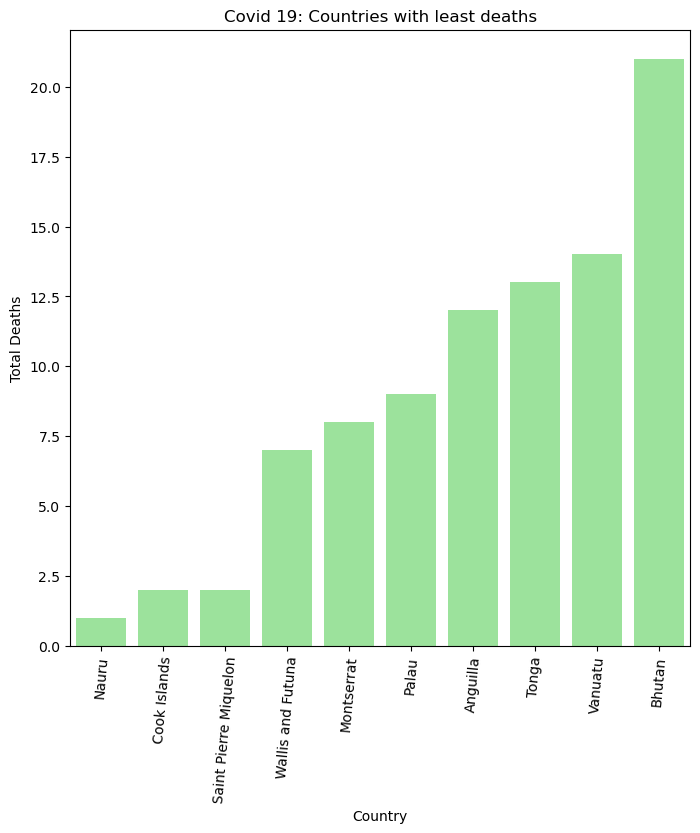

In [77]:
plt.figure(figsize=(8,8))
graph=sns.barplot(y='Total Deaths',x='Country', color="lightgreen",data=least_deaths)
graph.set_title('Covid 19: Countries with least deaths')
plt.xticks(rotation=85)
plt.savefig('least_bar.png')
plt.show()

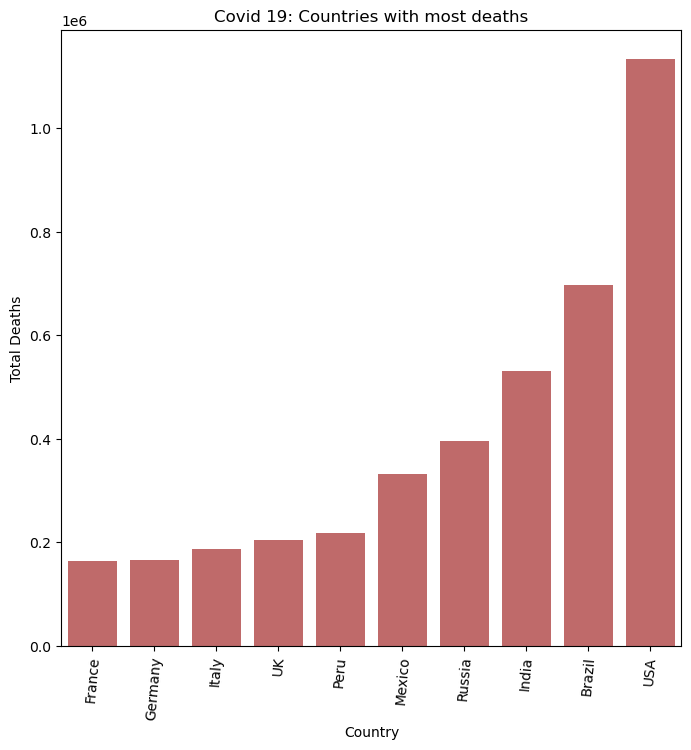

In [79]:
plt.figure(figsize=(8,8))
graph=sns.barplot(y='Total Deaths',x='Country', color="indianred",data=most_deaths)
graph.set_title('Covid 19: Countries with most deaths')
plt.xticks(rotation=85)
plt.savefig('most_bar.png')
plt.show()

In [83]:
compare = data[['Total Deaths', 'Country','Total Recovered']].sort_values(by="Total Deaths",ascending=False)
compare = compare.head(10)
compare.head(10)

,Total Deaths,Country,Total Recovered
0,1132935,USA,101322779
4,697074,Brazil,35919372
1,530740,India,44150289
9,395108,Russia,21356008
18,332198,Mexico,6606633
34,218931,Peru,4258688
8,204171,UK,24020088
7,186833,Italy,25014986
3,165711,Germany,37398100
2,164233,France,39264546


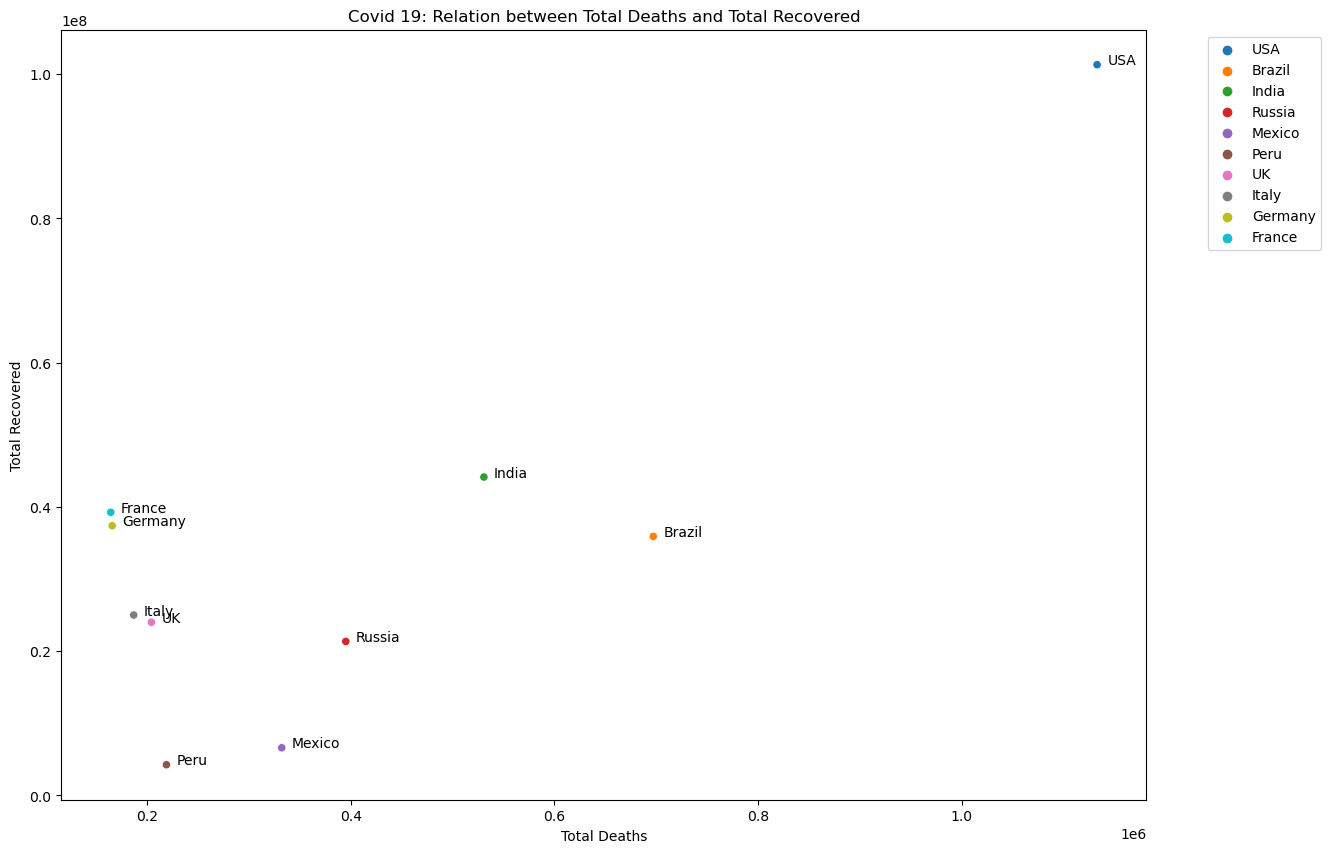

In [85]:
plt.figure(figsize=(14, 10))

sns.scatterplot(data=compare, x='Total Deaths', y='Total Recovered', hue='Country')

plt.xlabel('Total Deaths')
plt.ylabel('Total Recovered')
plt.title('Covid 19: Relation between Total Deaths and Total Recovered')

plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
for index, row in compare.iterrows():
    plt.text(row['Total Deaths'] + 10000, row['Total Recovered'] + 10000, row['Country'])
plt.savefig('death_to_recovered.png')
plt.show()

In [120]:
deaths_to_recovered = px.scatter(data_frame = data, x="Total Deaths", y="Total Recovered", size="Total Recovered", trendline="ols", title="Covid 19: Relation between Total Deaths and Total Recovered")
deaths_to_recovered.show()

In [91]:
population_to_deaths = data[['Total Deaths','Country','Population']].sort_values(by="Population",ascending=False)
population_to_deaths = population_to_deaths.head(10)
population_to_deaths

,Total Deaths,Country,Population
1,530740,India,1406631776
0,1132935,USA,334805269
19,160817,Indonesia,279134505
52,30640,Pakistan,229488994
107,3155,Nigeria,216746934
4,697074,Brazil,215353593
47,29442,Bangladesh,167885689
9,395108,Russia,145805947
18,332198,Mexico,131562772
5,68399,Japan,125584838


In [119]:
population_to_deaths = data[['Total Deaths','Country','Population']].sort_values(by="Population",ascending=False)

deaths_to_population = px.scatter(data_frame = population_to_deaths, x="Total Deaths", y="Population", size="Population", trendline="ols", title="Covid 19: Relation between Total Deaths and Population size")
deaths_to_population.show()

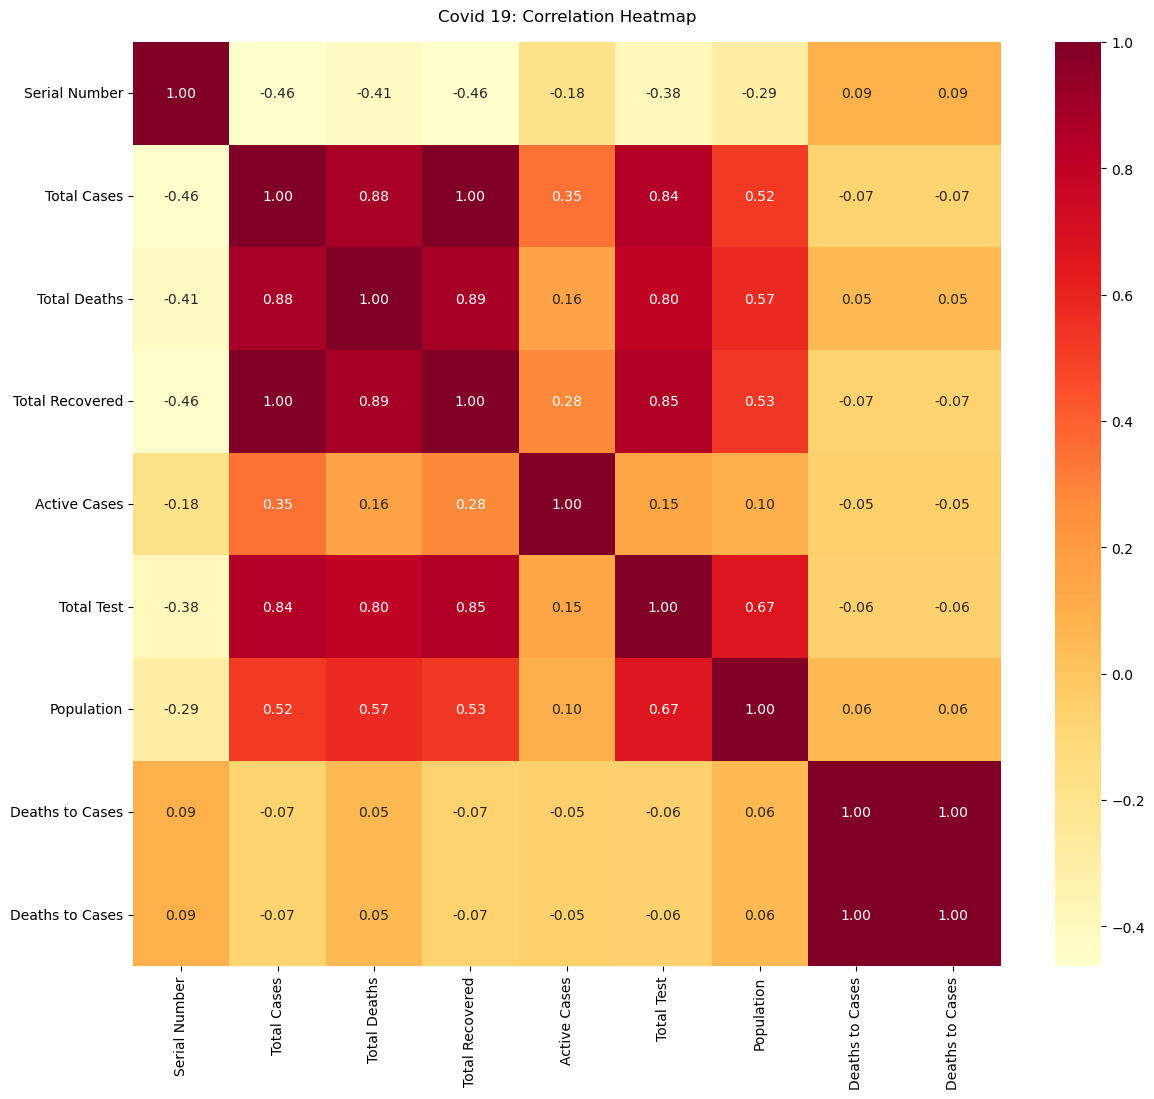

In [133]:
plt.figure(figsize=(14,12))
heatmap = sns.heatmap(data.corr(), annot = True, cmap= 'YlOrRd', fmt= '.2f')
heatmap.set_title("Covid 19: Correlation Heatmap", pad = 15)
plt.savefig('heatmap.png')
plt.show()